In [0]:
!pip install torch
!pip install torchvision

import torch 
import torchvision

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cd sample_data/

/content/sample_data


In [4]:
ls

anscombe.json*                mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md*


In [6]:
#uploading dataset
from google.colab import files

upload = files.upload()

Saving test.csv to test.csv


In [0]:
#reading the data
df = pd.read_csv('train.csv')

In [51]:
#first five rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
#info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
#droping the unwanted features

unwanted_features = ['PassengerId','Name','Ticket',
                    'Cabin','SibSp','Parch','Embarked']

In [0]:
#droping the features
df = df.drop(unwanted_features,axis=1)

In [55]:
#first five rows of the dataset
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [56]:
#checking if any missing values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [0]:
#droping the missing values
df.dropna(inplace=True)

In [0]:
# label encoding the category cols
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [59]:
df['Sex'] = le.fit_transform(df['Sex'])

df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [0]:
#features of the dataset
features = ['Pclass','Sex','Age','Fare']

In [61]:
#dividing the data in to independent and dependent data

X = df[features]
y = df['Survived']

X.head()


,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [62]:
# one hot encoding the Pclass column

X = pd.get_dummies(X,columns=['Pclass'])
X.head()

,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3
0,1,22.0,7.2500,0,0,1
1,0,38.0,71.2833,1,0,0
2,0,26.0,7.9250,0,0,1
3,0,35.0,53.1000,1,0,0
4,1,35.0,8.0500,0,0,1


In [0]:
# train and test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                random_state=0)



In [64]:
# shape of the data after splitting the data
print('shape of the x train : {} rows and {} columns'.format(x_train.shape[0],x_train.shape[1]))
print('shape of the y train : {} rows and {} column'.format(y_train.shape[0],1))
print('shape of the x test  : {} rows and {} columns'.format(x_test.shape[0],x_test.shape[1]))
print('shape of the y test  : {} rows and {} column'.format(y_test.shape[0],1))


shape of the x train : 571 rows and 6 columns
shape of the y train : 571 rows and 1 column
shape of the x test  : 143 rows and 6 columns
shape of the y test  : 143 rows and 1 column


In [0]:
# converting dataframe in to numpy arrays
x_train = x_train.values
x_test  = x_test.values

In [0]:
# label columns
y_test = y_test.values
y_train= y_train.values

In [0]:
# converting numpy arrays in to tensors
x_train = torch.from_numpy(x_train).float()
x_test  = torch.from_numpy(x_test).float()

In [0]:
#label columns
y_train = torch.from_numpy(y_train).view(1,-1)[0]
y_test  = torch.from_numpy(y_test).view(1,-1)[0]

In [0]:
# libraries for the torch
import torch 
import torch.nn as nn
import torch.nn.functional as func

In [0]:
# setting parameters

input_size = 6
output_size = 2
hidden_size = 10

In [0]:
class Net(nn.Module):
  
  def __init__(self):
    super(Net,self).__init__()
    
    self.fc1 = nn.Linear(input_size,hidden_size)  # first layer 10 units
    self.fc2 = nn.Linear(hidden_size,hidden_size) # second layer 
    self.fc3 = nn.Linear(hidden_size,output_size) # third layer
    
  def forward(self,x):
    
    x = func.sigmoid(self.fc1(x))
    x = func.sigmoid(self.fc2(x))
    x = self.fc3(x)
    
    return func.log_softmax(x,dim=-1)
    
    
    
    
    
    
    
    

In [0]:
# initiating model
model = Net()

In [0]:
# loading the optimizer
import torch.optim as optim

In [0]:
# initiating the optimizer
optimizer = optim.Adam(model.parameters())

loss_fn   = nn.NLLLoss()

In [0]:
# setting epocs
epoch_data = []
epochs = 1001

In [85]:
# training the data

for epoch in range(1,epochs):
  
  optimizer.zero_grad()    # setting optimizer weights to zero
  
  ypred = model(x_train)   # predicting from model 
  
  loss = loss_fn(ypred,y_train) #computing the loss
  
  loss.backward()    # computing the gradients backward
  
  optimizer.step()  # updating the gradients
  
  ypred_test = model(x_test)
  loss_test = loss_fn(ypred_test,y_test)
  
  _ , pred = ypred_test.data.max(1)
  
  accuracy = pred.eq(y_test.data).sum().item() / 143
  epoch_data.append([epoch,loss.data.item(),loss_test.item(),accuracy])
  
  if epoch % 100 == 0:
    print('epoch - %d (%d%%) train loss - %.2f test loss - %.2f accuracy - %.4f'
                                              % (epoch,epoch/150 * 10,loss.data.item(),loss_test.data.item(),accuracy))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch - 100 (6%) train loss - 0.65 test loss - 0.67 accuracy - 0.5524
epoch - 200 (13%) train loss - 0.61 test loss - 0.62 accuracy - 0.6853
epoch - 300 (20%) train loss - 0.59 test loss - 0.59 accuracy - 0.6783
epoch - 400 (26%) train loss - 0.56 test loss - 0.56 accuracy - 0.6853
epoch - 500 (33%) train loss - 0.50 test loss - 0.49 accuracy - 0.7832
epoch - 600 (40%) train loss - 0.46 test loss - 0.42 accuracy - 0.8392
epoch - 700 (46%) train loss - 0.44 test loss - 0.41 accuracy - 0.8462
epoch - 800 (53%) train loss - 0.43 test loss - 0.41 accuracy - 0.8322
epoch - 900 (60%) train loss - 0.42 test loss - 0.41 accuracy - 0.8322
epoch - 1000 (66%) train loss - 0.41 test loss - 0.42 accuracy - 0.8322


In [0]:
# convert epoch data in to data
df_epoch_data = pd.DataFrame(epoch_data,columns=['epochs','train_loss','test_loss','accuracy'])

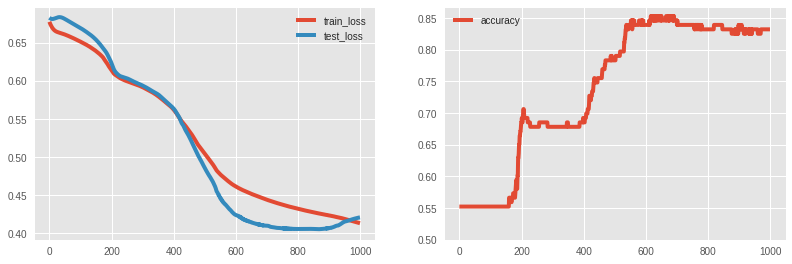

In [91]:
# plotting the data
plt.style.use('ggplot')
f, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

df_epoch_data[['train_loss','test_loss']].plot(ax=ax1)
df_epoch_data[['accuracy']].plot(ax=ax2)
plt.ylim(ymin=0.5)
plt.show()